In [2]:
from pyomo.environ import *
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# from soft_impute import SoftImpute
from collections import OrderedDict

### Prepare data

#### 0. Read whole data

In [6]:
data = pd.read_json('ALL_recipes_data.json')
data.tail()

,page_url,title,total_time,rating,personal_rating,ingred,nutrition
1284,https://www.food.com/recipe/gingerbread-for-co...,GINGERBREAD (FOR COOKIES OR A GINGERBREAD HOUSE),0,4.57,"{'Elielia': 5.0, 'iceitup': 5.0, 'Lavender Lyn...","[baking soda, clove, margarine, egg, molasses,...","{'Calories': 938.0, 'Fat': 28.0, 'Cholesterol'..."
1285,https://www.food.com/recipe/yeast-free-bread-6...,YEAST FREE BREAD,0,4.17,"{'pscheller': 4.0, 'allergymomma': 5.0, 'SMH40...","[water, salt, whole wheat flour, baking powder]","{'Calories': 16957.0, 'Fat': 602.0, 'Cholester..."
1286,https://www.food.com/recipe/super-easy-naan-br...,SUPER EASY NAAN BREAD,55,4.44,"{'crimsonfae': 5.0, 'Luke M.': 4.0, 'Bay Haven...","[flour, active dry yeast, warm water, salt, su...","{'Calories': 180.0, 'Fat': 5.0, 'Cholesterol':..."
1287,https://www.food.com/recipe/pesto-49909?ftab=r...,PESTO,10,4.88,"{'Bergy': 5.0, 'kuboti1': 5.0, 'Diana Adcock':...","[garlic, olive oil, parmesan cheese, basil, pi...","{'Calories': 1376.0, 'Fat': 108.0, 'Cholestero..."
1288,https://www.food.com/recipe/softest-ever-bread...,SOFTEST EVER BREAD MACHINE BREAD,10,4.83,"{'DanielleLyn': 5.0, 'SubeeJones': 5.0, 'Princ...","[bread flour, white sugar, warm water, salt, b...","{'Calories': 19673.0, 'Fat': 587.0, 'Cholester..."


In [7]:
data.isnull().any()

page_url           False
title              False
total_time         False
rating             False
personal_rating    False
ingred             False
nutrition          False
dtype: bool

In [8]:
data.describe(include = 'all')

TypeError: unhashable type: 'dict'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1648, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'dict'


TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1648, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


TypeError: unhashable type: 'dict'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1648, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'dict'


,page_url,title,total_time,rating,personal_rating,ingred,nutrition
count,1289,1289,1289.000000,1289.000000,1289,1289,1289
unique,1289,1289,NaN,NaN,1289,1287,1288
top,https://www.food.com/recipe/pork-steak-42905?f...,ZIPPITY DOOO DAAAA ORZO SALAD!,NaN,NaN,"{'SlipC': 5.0, 'Devon S': 5.0, 'Maeven6': 5.0,...",[barbecue sauce],"{'Calories': 0.0, 'Fat': 0.0, 'Cholesterol': 0..."
freq,1,1,NaN,NaN,1,2,2
mean,NaN,NaN,106.024825,4.707898,NaN,NaN,NaN
std,NaN,NaN,596.770795,0.179261,NaN,NaN,NaN
min,NaN,NaN,0.000000,3.830000,NaN,NaN,NaN
25%,NaN,NaN,15.000000,4.620000,NaN,NaN,NaN
50%,NaN,NaN,30.000000,4.740000,NaN,NaN,NaN
75%,NaN,NaN,50.000000,4.840000,NaN,NaN,NaN


#### Eliminate total time = 0

In [9]:
data = data[data.total_time != 0]
data.describe(include = 'all')

TypeError: unhashable type: 'dict'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1648, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'dict'


TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1648, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


TypeError: unhashable type: 'dict'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1648, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'dict'


,page_url,title,total_time,rating,personal_rating,ingred,nutrition
count,1233,1233,1233.000000,1233.000000,1233,1233,1233
unique,1233,1233,NaN,NaN,1233,1231,1233
top,https://www.food.com/recipe/pork-steak-42905?f...,ZIPPITY DOOO DAAAA ORZO SALAD!,NaN,NaN,"{'NanaRLL': 5.0, 'jewelrybug': 3.0, 'Lindas Bu...","[eggs, water]","{'Calories': 4986.0, 'Fat': 265.0, 'Cholestero..."
freq,1,1,NaN,NaN,1,2,1
mean,NaN,NaN,110.840227,4.707899,NaN,NaN,NaN
std,NaN,NaN,609.745176,0.180003,NaN,NaN,NaN
min,NaN,NaN,2.000000,3.830000,NaN,NaN,NaN
25%,NaN,NaN,17.000000,4.620000,NaN,NaN,NaN
50%,NaN,NaN,30.000000,4.740000,NaN,NaN,NaN
75%,NaN,NaN,50.000000,4.840000,NaN,NaN,NaN


#### 1. Nutrition matrix

In [10]:
nutri_matrix = pd.DataFrame()
nd = []
for d in data.nutrition:
    nd.append(d)
nutri_matrix = nutri_matrix.append(nd)
nutri_matrix.index = data.title
nutri_matrix.tail()

,Calories,Fat,Cholesterol,Sodium,Carbohydrate,Protein
title,,,,,,
MARINATED POTATO AND GREEN BEAN SALAD,5145.0,366.0,0.0,6221.0,43.0,64.0
COTTAGE CHEESE FRUIT SALAD,2166.0,96.0,96.0,2655.0,261.0,77.0
SUPER EASY NAAN BREAD,180.0,5.0,0.0,2935.0,378.0,52.0
PESTO,1376.0,108.0,73.0,1305.0,62.0,52.0
SOFTEST EVER BREAD MACHINE BREAD,19673.0,587.0,0.0,2344.0,3143.0,416.0


#### 2. Time matrix

In [11]:
time_matrix = pd.DataFrame(data = data.total_time)
time_matrix.index = data.title
time_matrix.tail()

,total_time
title,
MARINATED POTATO AND GREEN BEAN SALAD,50
COTTAGE CHEESE FRUIT SALAD,180
SUPER EASY NAAN BREAD,55
PESTO,10
SOFTEST EVER BREAD MACHINE BREAD,10


#### 3. Ingredient matrix

In [12]:
ingredMat = pd.read_csv('ingredientMatrixFoodDotCom.csv')
ingredMat = ingredMat.fillna(0)
title = ingredMat['Unnamed: 0']
title = title.rename('title')
ingredMat = ingredMat.drop('Unnamed: 0', axis=1)
ingredMat.index = title
ingredMat = ingredMat.T
ingredMat.tail()

FileNotFoundError: [Errno 2] File ingredientMatrixFoodDotCom.csv does not exist: 'ingredientMatrixFoodDotCom.csv'

#### 4. Ratings matrix

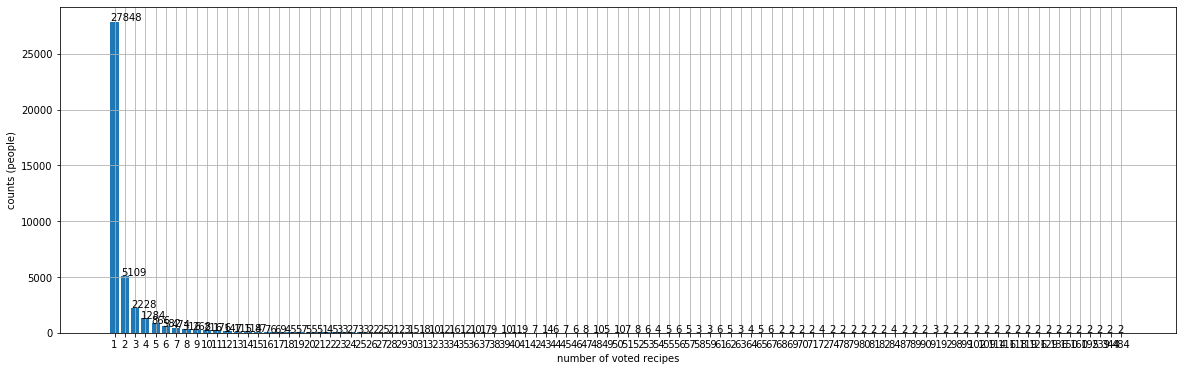

In [16]:
# Get all users
users = {} # key = user, value = count 
for ratings in data.personal_rating:
    for r in ratings:
        users[r] = users.get(r, 0) +1

# number of votes
votes = {}
for u in users:
    votes[users[u]] = votes.get(users[u], 1) + 1
sorted_votes = OrderedDict(sorted(votes.items()))
sorted_votes

# plot the relationship of number of voted recipes and number of people 
fig = plt.figure(figsize = (20,6))
ax = plt.bar([str(k) for k in sorted_votes.keys()], sorted_votes.values())
for p in ax.patches:
    plt.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.005))
plt.xlabel('number of voted recipes')
plt.ylabel('counts (people)')
plt.grid()

In [30]:
vote_df = pd.DataFrame()
vote_df['voting_freq'] = sorted_votes.keys()
vote_df['count'] = sorted_votes.values()
vote_df

,voting_freq,count
0,1,27848
1,2,5109
2,3,2228
3,4,1284
4,5,866
...,...,...
94,160,2
95,195,2
96,239,2
97,344,2


In [32]:
for i in range(len(vote_df['count'])):
    if vote_df['count'][i]>=21:
        

SyntaxError: unexpected EOF while parsing (<ipython-input-32-2522e271718a>, line 1)

In [29]:
vote_df.to_csv('vote_df.csv')

In [27]:
sorted_votes.values()

odict_values([27848, 5109, 2228, 1284, 866, 582, 474, 316, 268, 216, 176, 147, 115, 114, 87, 76, 69, 45, 57, 55, 51, 45, 33, 27, 33, 22, 25, 21, 23, 15, 18, 10, 12, 16, 12, 10, 17, 9, 10, 11, 9, 7, 14, 6, 7, 6, 8, 10, 5, 10, 7, 8, 6, 4, 5, 6, 5, 3, 3, 6, 5, 3, 4, 5, 6, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [71]:
# Since the matrix did not converge if I use all the voters,
# try use those who has voded 2 recipes or more.
useful_users = set()
for u in users:
    if(users[u] > 3):
        useful_users.add(u)
len(useful_users)

5502

In [126]:
# Create rating matrix
ratingMat = pd.DataFrame(columns = data.title, index = useful_users, dtype='float')
for idx, row in data.iterrows():
    for user in row.personal_rating:
        if user in useful_users:
            if (type(row.personal_rating[user])) is float:
                ratingMat.at[user, row.title] = row.personal_rating[user]
ratingMat.shape

(5502, 1233)

In [128]:
# Remove all recipes that no one has no one voted
useless_recipes = ratingMat.columns[ratingMat.isna().sum() == len(useful_users)]
ratingMat = ratingMat.drop(columns = useless_recipes)
ratingMat.tail()

title,DRY RUB PORK RIBS,TUNA SANDWICH OR SALAD,EASY ASIAN BEEF & NOODLES - WW RECIPE,SESAME PORK STIR FRY,THAI SHRIMP (CHILI) SOUP,CHEESY HAM AND POTATO SOUP,SWEET AND SOUR CHICKEN,PERFECT ROAST TURKEY,GREEK LEMON CHICKEN WITH POTATOES,CHILI-GARLIC MARINATED PORK CHOPS,...,ZUCCHINI MARINATA (MARINATED ZUCCHINI SALAD),ZIPPITY DOOO DAAAA ORZO SALAD!,FAILPROOF FRENCH BREAD (BREAD MACHINE),KITTENCAL'S THICK AND RICH CREAMY TOMATO SOUP (LOW-FAT OPTION),BAKED ASPARAGUS,MARINATED POTATO AND GREEN BEAN SALAD,COTTAGE CHEESE FRUIT SALAD,SUPER EASY NAAN BREAD,PESTO,SOFTEST EVER BREAD MACHINE BREAD
Suzy Q Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annisette,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nikki Kate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
messystation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
barbacious,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Complete rating matrix

In [134]:
R = np.array(ratingMat)
ratio = []
for l in range(0,10):
    clf = SoftImpute(J=10, thresh=1e-09,maxit=5000, lambda_=l/10.0)
    clf.fit(R)
    imputed = clf.predict(R)
    print(l/10.0, clf.ratio)
    ratio.append((l/10.0, clf.ratio))

0.0 -1.9865037497996523e-05
0.1 -1.2693337976213812e-05
0.2 -1.4162376735805327e-05
0.3 -5.706460831868727e-06
0.4 -3.012815160447282e-06
0.5 -1.166606623625232e-05
0.6 -6.085128296381111e-06
0.7 -1.660555019835971e-05
0.8 -4.7665844710614246e-05
0.9 -3.839833140282381e-05


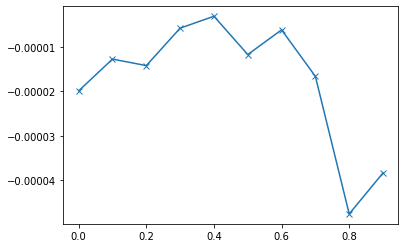

In [155]:
x = [ratio[i][0] for i in range(len(ratio))]
y = [ratio[i][1] for i in range(len(ratio))]
plt.plot(x, y, marker='x');

In [156]:
clf = SoftImpute(J=10, thresh=1e-09,maxit=5000, lambda_=0.8)
clf.fit(R)
imputed = clf.predict(R)

In [159]:
imputed

array([[ 2.98971217, -0.11735371,  1.16578159, ..., -0.7594887 ,
         2.26299627,  1.77671621],
       [ 3.52572662,  4.17528427,  3.96052813, ...,  1.91988995,
         5.30988015,  6.27824846],
       [-2.63835721, -1.52999629, -0.56985115, ..., -0.39691947,
        -1.34340817,  2.10130173],
       ...,
       [ 3.28125373,  0.11416052,  5.14667337, ..., -1.41226751,
         5.18858585,  2.98551141],
       [ 1.07335864,  0.41809687,  1.5823166 , ...,  0.57774811,
         4.93542774,  5.88091965],
       [ 1.0296528 , -2.1556794 , -0.07564959, ..., -0.05474352,
         3.0426298 ,  3.10763695]])

In [210]:
recipes = ratingMat.columns
users = ratingMat.index
completeRatingMat = pd.DataFrame(imputed, columns = recipes, index = users)
completeRatingMat.tail()

title,DRY RUB PORK RIBS,TUNA SANDWICH OR SALAD,EASY ASIAN BEEF & NOODLES - WW RECIPE,SESAME PORK STIR FRY,THAI SHRIMP (CHILI) SOUP,CHEESY HAM AND POTATO SOUP,SWEET AND SOUR CHICKEN,PERFECT ROAST TURKEY,GREEK LEMON CHICKEN WITH POTATOES,CHILI-GARLIC MARINATED PORK CHOPS,...,ZUCCHINI MARINATA (MARINATED ZUCCHINI SALAD),ZIPPITY DOOO DAAAA ORZO SALAD!,FAILPROOF FRENCH BREAD (BREAD MACHINE),KITTENCAL'S THICK AND RICH CREAMY TOMATO SOUP (LOW-FAT OPTION),BAKED ASPARAGUS,MARINATED POTATO AND GREEN BEAN SALAD,COTTAGE CHEESE FRUIT SALAD,SUPER EASY NAAN BREAD,PESTO,SOFTEST EVER BREAD MACHINE BREAD
Suzy Q Z,-3.424694,-2.162273,-1.402905,-4.156174,-7.862364,5.287908,0.900784,-6.237063,-3.533761,-5.778974,...,-2.777159,-3.953703,2.161160,4.051720,-4.776030,-1.693458,-0.963523,-0.598332,-1.836697,0.879593
Annisette,5.108859,3.152194,4.567299,3.965821,3.396013,6.078400,5.139176,3.481773,4.586063,3.933732,...,5.473716,3.762838,5.323005,6.081752,3.540969,5.704439,4.971479,0.007893,5.407547,5.883470
Nikki Kate,3.281254,0.114161,5.146673,6.228779,1.227499,3.151220,3.049150,5.729837,5.782761,1.292218,...,2.173434,2.624719,3.062407,-0.610662,4.791097,2.862444,3.269159,-1.412268,5.188586,2.985511
messystation,1.073359,0.418097,1.582317,3.590422,1.082175,5.569804,2.312882,2.401123,2.302374,1.830144,...,1.992128,2.605992,3.707678,3.202597,0.774135,2.689643,3.919275,0.577748,4.935428,5.880920
barbacious,1.029653,-2.155679,-0.075650,-3.994183,-2.345232,4.568223,0.262151,-4.740596,2.109029,-1.749656,...,-1.853312,-1.177100,6.270765,3.358609,1.384212,-1.233416,-1.236327,-0.054744,3.042630,3.107637


#### 5. Retain the recipes that exist in the final table

In [190]:
valid_recipes = ratingMat.columns

In [212]:
NutritionMat = nutri_matrix[nutri_matrix.index.isin(valid_recipes)]
TimeMat = time_matrix[time_matrix.index.isin(valid_recipes)]
IngredientMat = ingredMat[ingredMat.index.isin(valid_recipes)]
RatingMat = completeRatingMat

In [213]:
# backup
NutritionMat.to_csv('backup/nutriMatrix_food.com.csv')
TimeMat.to_csv('backup/timeMatrix_food.com.csv')
IngredientMat.to_csv('backup/ingredMatrix_food.com.csv')
ratingMat.to_csv('backup/ratingMatrix_food.com.csv')
completeRatingMat.to_csv('backup/compltetRatingMatrix_food.com.csv')

In [214]:
# Names of all users, recipes, ingredients, and nutritions
users = RatingMat.index
recipes = RatingMat.columns
ingredients = IngredientMat.columns
nutritions = NutritionMat.columns

### Parameters

In [220]:

nutri_matrix.tail()

,Calories,Fat,Cholesterol,Sodium,Carbohydrate,Protein
title,,,,,,
MARINATED POTATO AND GREEN BEAN SALAD,5145.0,366.0,0.0,6221.0,43.0,64.0
COTTAGE CHEESE FRUIT SALAD,2166.0,96.0,96.0,2655.0,261.0,77.0
SUPER EASY NAAN BREAD,180.0,5.0,0.0,2935.0,378.0,52.0
PESTO,1376.0,108.0,73.0,1305.0,62.0,52.0
SOFTEST EVER BREAD MACHINE BREAD,19673.0,587.0,0.0,2344.0,3143.0,416.0


In [236]:
data_param = {
    "NumberOfRecipes": len(recipes),
    "AvailableTime":[[60,30,0,30,60],[60,0,60,60,0]],
    "Ratings":RatingMat.iloc[0:2, :].values.tolist(),
    "NutritionMatrix":[list(NutritionMat.iloc[r]) for r in range(len(recipes))],
    "CookingTime":TimeMat.total_time.values,
    "NutritionBounds": [
        [[2000,4000],[20,200],[0,200],[2000,4000],[500,3000],[100,600]],
        [[2000,4000],[20,200],[0,200],[2000,4000],[500,3000],[100,600]]],
    "DishesPerDay":[1,2],
    "MaxDishesMadePerDay":3,
    "RepeatedRecipe": 2,
    "IngredientMatrix":[list(IngredientMat.iloc[r]) for r in range(len(recipes))],
    "IngredientFondness": [[3 for i in range(len(ingredients))],
                            [3 for i in range(len(ingredients))]],
    "TotalDays":5
}

### Model Class

In [218]:
class modelClass():
    
    # decorator
    def _timer(func):
        import time
        def wrapper(*args, **kwargs):
            t1 = time.perf_counter()
            result = func( *args, **kwargs)
            print(func.__name__," executes", round(time.perf_counter() - t1,3),'s')
            return result
        return wrapper
    
    def __init__(self, data, solver = "cplex"):
        
        # public abstract model
        self.model = None
        
        # public model instance
        self.instance = None
        
        # public data
        self.d = data
        
        # public optimal solutions 
        self.xs = []
        self.ys = []
        
        # public results
        self.results = None
        
        # private classified optimal solutions (for solving alternative optima) 
        self.__x0 = []
        self.__x1 = []
        self.__y0 = []
        self.__y1 = []
        
        # private solver
        self.__solver = solver
        
        # private helper variables
        self.__K = self.d["NumberOfRecipes"]
        self.__I = len(self.d["IngredientMatrix"][0])
        self.__N = len(self.d["NutritionMatrix"][0])
        self.__dd = data["TotalDays"]
        self.__counter = 0
        
        
        # build the basic model when initialized
        self.BuildBasicModel()
        
    @_timer    
    def BuildBasicModel(self):
        # length of recipes
        K = self.__K
        
        # length of ingredients
        I = self.__I
        
        # length of nutritions
        N = self.__N 
        
        # total amount of days
        dd = self.__dd 
        
        # data
        data = self.d
        
        # create abstract model
        m = AbstractModel()
        
        # dummy variables
        m.p = range(2)
        m.d = range(dd)
        m.k = range(K)        

        # decision variables
        m.x = Var(m.d, m.k, domain = Binary)
        m.y = Var(m.p, m.d, m.k, domain = Binary)


        # daily number of meals constraits 
        m.MinMealPerDay = Constraint(m.d, rule = lambda m, d: np.sum([m.x[d,k] for k in range(K)]) >= data["DishesPerDay"][0])
        m.MaxMealPerDay = Constraint(m.d, rule = lambda m, d: np.sum([m.x[d,k] for k in range(K)]) <= data["DishesPerDay"][1])

        # nutrition constraints
        m.NutritionLowerBounds = Constraint(range(N), m.p, m.d, 
                            rule = lambda m, n, p, d: np.sum([m.x[d,k]*data["NutritionMatrix"][k][n] for k in range(K)]) 
                                            >= data["NutritionBounds"][p][n][0])
        m.NutritionUpperBounds = Constraint(range(N), m.p, m.d, 
                            rule = lambda m, n, p, d: np.sum([m.x[d,k]*data["NutritionMatrix"][k][n] for k in range(K)]) 
                                            <= data["NutritionBounds"][p][n][1])

        # total available time constraints
        m.TotalAvailableTime = Constraint(m.p, m.d, 
                            rule = lambda m, p, d: np.sum([m.y[p,d,k]*data["CookingTime"][k] for k in range(K)]) 
                                          <= data["AvailableTime"][p][d])

        # number of made dishes per day
        m.MadeDishesLowerBound = Constraint(m.p, m.d, rule = lambda m, p, d: np.sum([m.y[p,d,k] for k in range(K)]) 
                                            <= data["MaxDishesMadePerDay"])

        # two people cannot cook the same dish
        m.NoOverlap = Constraint(
            rule = lambda m: np.sum([[m.y[0,d,k]*m.y[1,d,k] for d in range(dd)] for k in range(K)]) <= 0)

        # each recipe should not repeat # times
        m.Repetition = Constraint(m.k,
            rule = lambda m, k: np.sum([m.x[d,k] for d in range(dd)]) <= data["RepeatedRecipe"])
        
        
        # y = x
        # m.Equality = Constraint(rule = lambda m: np.sum([[(m.y[0,d,k] + m.y[1,d,k]) for d in range(dd)]for k in range(K)])
        #                       - np.sum([[m.x[d,k] for d in range(dd)]for k in range(K)]) == 0)

        # schedual constraints
        # m.LastDay = Constraint(
        #     rule = lambda m: np.sum([[((m.y[0,d,k] + m.y[1,d,k]) - m.x[d,k]) * m.x[d,k] for d in range(dd)]for k in range(K)]) >= -0.5)

        m.Recipe = Constraint(m.k,
            rule = lambda m, k: np.sum([(5-d) * (m.y[0,d,k] + m.y[1,d,k] - m.x[d,k]) for d in range(dd)]) >= 0)

        m.Equality = Constraint(m.k,
            rule = lambda m, k: np.sum([(m.y[0,d,k] + m.y[1,d,k] - m.x[d,k]) for d in range(dd)]) == 0)

        #objective function
        def obj_func(m):            
            expr = np.sum([[(data["Ratings"][0][k] + data["Ratings"][1][k])*m.x[d,k] for d in range(dd)] for k in range(K)])
            - np.sum([[[(dd-2*d)*(data["AvailableTime"][p][d] - data["CookingTime"][k]*m.y[p,d,k]) for p in range(2)] for d in range(dd)] for k in range(K)]) 
            + np.sum([[[[(data["IngredientFondness"][p][i] - data["IngredientMatrix"][k][i])*m.x[d,k] for i in range(I)] 
                        for p in range(2)] for d in range(dd)] for k in range(K)])
            return expr
        m.Obj = Objective(rule = obj_func,sense = maximize)
        
        # restore the model 
        self.model = m
    
    @_timer    
    def SolveForAlternative(self):
        # If the model does not exists
        if not self.model:
            print("The model has not been solved yet.")
            return
        # If the model is not feasible
        if not self.xs:
            print("The model is not feasible")
            return
        
        len_x1 = len(self.__x1)
        self.model.add_component("Additional" + str(self.__counter),\
           Constraint(rule = lambda m: np.sum([m.x[l[0],l[1]] for l in self.__x1]) 
                      - np.sum([m.x[o[0],o[0]] for o in self.__x0]) <= len_x1 - 1))
        self.__counter += 1
        self.Solve()
    
    @_timer    
    def Solve(self, verbose = False):
        # instantiate the model
        self.instance = self.model.create_instance()
        
        # initialization is really important when calculations are needed in the constraints
        for p in range(2):
            for d in range(self.__dd):
                for k in range(self.__K):
                    self.instance.y[p,d,k] = 0
        for d in range(self.__dd):
            for k in range(self.__K):
                self.instance.x[d,k] = 0                
        
        #solve
        cpx = SolverFactory(self.__solver)
        self.results = cpx.solve(self.instance)
        if verbose:
            self.instance.display()
        
        #restore solution
        self.xs = list(self.getXs())
        self.ys = list(self.getYs())
        
        if self.xs:
            self.__x0 = list(self.getXs(0))
            self.__x1 = self.xs
            self.__y0 = list(self.getYs(0))
            self.__y1 = self.ys
            self.VisualizeY()
            self.VisualizeX()        
        else:
            print("The model is not feasible.")
        
       
    def getYs(self, v = 1):
        for i in range(2):
            for j in range(self.__dd):
                for k in range(self.__K):
                    if (abs(self.instance.y[i,j,k]() - v) <= 0.01):
                        yield (i,j,k)
                         
    def getXs(self, v = 1):
        for j in range(self.__dd):
            for k in range(self.__K):
                if (abs(self.instance.x[j,k]() - v) <= 0.01):
                    yield (j,k)
                       
    def VisualizeY(self):
        minPerDay =2.5*60
        schedule = pd.DataFrame(self.ys)
        PERSON = range(2)
        makespan = minPerDay

        bar_style = {'alpha':1.0, 'lw':25, 'solid_capstyle':'butt'}
        text_style = {'color':'black', 'weight':'bold', 'ha':'center', 'va':'center'}
        colors = mpl.cm.Dark2.colors

        fig, ax = plt.subplots(1,1, figsize=(13, 3))

        xs = xf = 0
        pre_person = 0
        pre_day = -1
        for r in self.ys:
            person = r[0] + 1
            day = r[1]
            recipe = r[2]
            if pre_person != person:
                xf = 0
            pre_person = person

            if pre_day != day:
                xf = day*minPerDay
            pre_day = day
            xs = xf 
            xf = xs + self.d["CookingTime"][recipe]
            ax.plot([xs, xf], [person]*2, c=colors[recipe%7], **bar_style)
            ax.text((xs + xf)/2, person, str(recipe), **text_style)

        ax.set_title('Cooking Schedule')
        ax.set_ylabel('Person')

        ax.set_ylim(0.5, 2.5)
        ax.set_yticks(range(1, 1 + 2))
        ax.set_yticklabels(range(2))
        ax.set_xlabel('Time (min)')
        ax.grid(True)
        for day in range(5):
            ax.plot([day * minPerDay]*2, ax.get_ylim(), 'r--')

        fig.tight_layout()
        plt.show()
           
    def VisualizeX(self):
        minPerDay =2.5*60
        schedule = pd.DataFrame(self.xs)
        makespan = minPerDay

        bar_style = {'alpha':1.0, 'lw':25, 'solid_capstyle':'butt'}
        text_style = {'color':'black', 'weight':'bold', 'ha':'center', 'va':'center'}
        colors = mpl.cm.Dark2.colors

        fig, ax = plt.subplots(1,1, figsize=(13, 3))

        xs = xf = 0
        pre_day = -1
        for r in self.xs:
            day = r[0]
            recipe = r[1]        
            if pre_day != day:
                xf = day*minPerDay
            pre_day = day
            xs = xf 
            xf = xs + 30
            ax.plot([xs, xf], [1]*2, c=colors[recipe%7], **bar_style)
            ax.text((xs + xf)/2, 1, str(recipe), **text_style)

        ax.set_title('Recommended Recipes for each day')
        ax.set_ylabel('Recipes')

        ax.set_ylim(0.5, 1.5)
        ax.set_yticks(range(1))
        ax.set_yticklabels(range(2))
        ax.set_xlabel('Time (min)')
        ax.grid(True)
        for day in range(5):
            ax.plot([day * minPerDay]*2, ax.get_ylim(), 'r--')

        fig.tight_layout()
        plt.show()
        

Solution1:
BuildBasicModel  executes 0.001 s


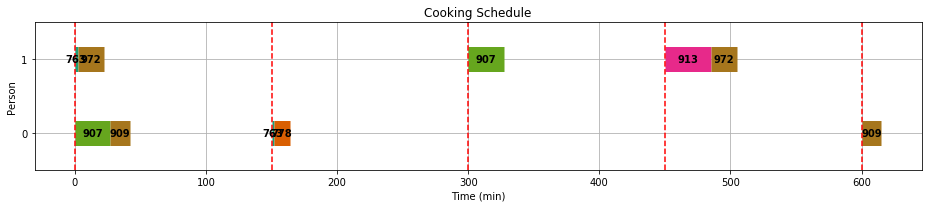

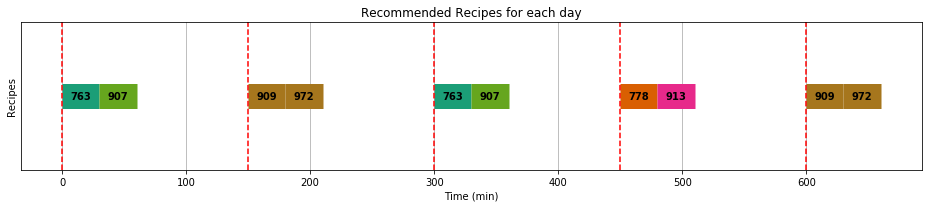

Solve  executes 20.051 s
Ys: [(0, 0, 907), (0, 0, 909), (0, 1, 763), (0, 1, 778), (0, 4, 909), (1, 0, 763), (1, 0, 972), (1, 2, 907), (1, 3, 913), (1, 3, 972)]
Xs: [(0, 763), (0, 907), (1, 909), (1, 972), (2, 763), (2, 907), (3, 778), (3, 913), (4, 909), (4, 972)]
----------------------------------------------------------------------------------------------------
Solution2 :


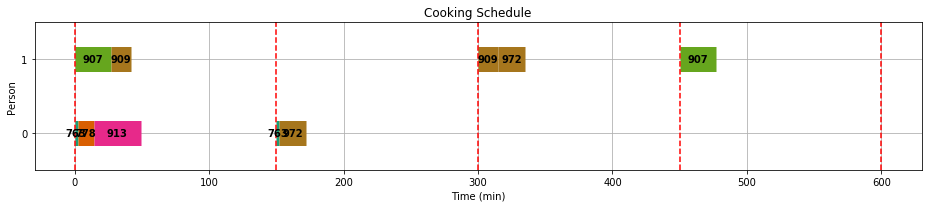

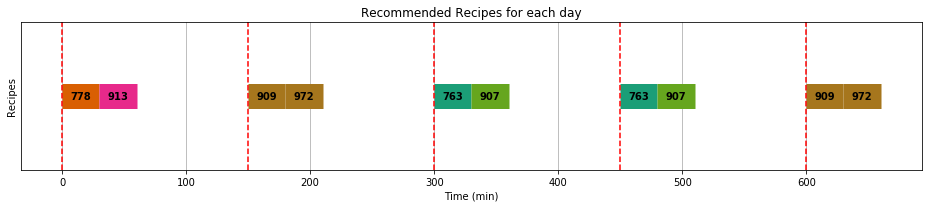

Solve  executes 20.712 s
SolveForAlternative  executes 20.712 s
Ys: [(0, 0, 763), (0, 0, 778), (0, 0, 913), (0, 1, 763), (0, 1, 972), (1, 0, 907), (1, 0, 909), (1, 2, 909), (1, 2, 972), (1, 3, 907)]
Xs: [(0, 778), (0, 913), (1, 909), (1, 972), (2, 763), (2, 907), (3, 763), (3, 907), (4, 909), (4, 972)]
----------------------------------------------------------------------------------------------------
Solution3 :


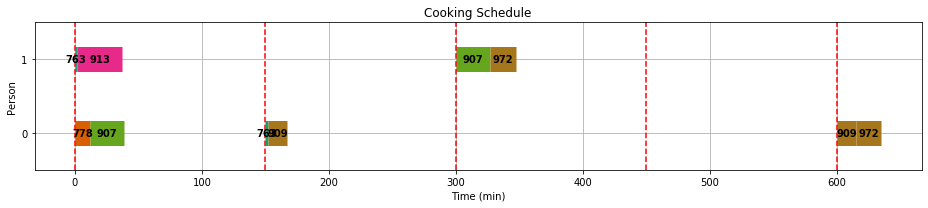

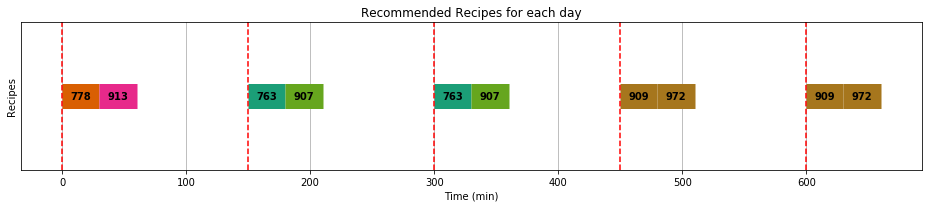

Solve  executes 20.5 s
SolveForAlternative  executes 20.501 s
Ys: [(0, 0, 778), (0, 0, 907), (0, 1, 763), (0, 1, 909), (0, 4, 909), (0, 4, 972), (1, 0, 763), (1, 0, 913), (1, 2, 907), (1, 2, 972)]
Xs: [(0, 778), (0, 913), (1, 763), (1, 907), (2, 763), (2, 907), (3, 909), (3, 972), (4, 909), (4, 972)]
----------------------------------------------------------------------------------------------------
Solution4 :


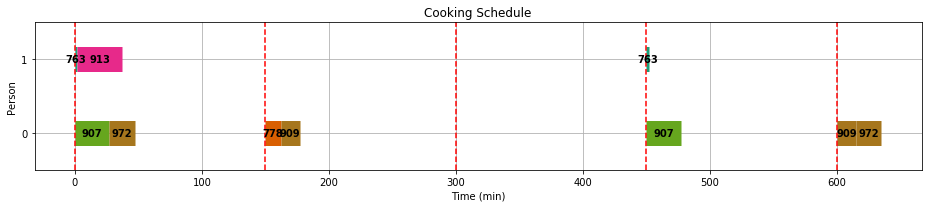

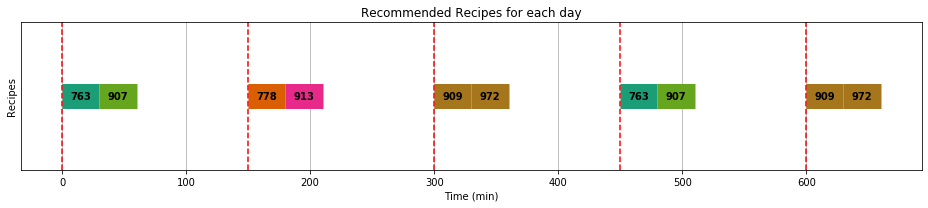

Solve  executes 20.492 s
SolveForAlternative  executes 20.493 s
Ys: [(0, 0, 907), (0, 0, 972), (0, 1, 778), (0, 1, 909), (0, 3, 907), (0, 4, 909), (0, 4, 972), (1, 0, 763), (1, 0, 913), (1, 3, 763)]
Xs: [(0, 763), (0, 907), (1, 778), (1, 913), (2, 909), (2, 972), (3, 763), (3, 907), (4, 909), (4, 972)]
----------------------------------------------------------------------------------------------------
Solution5 :


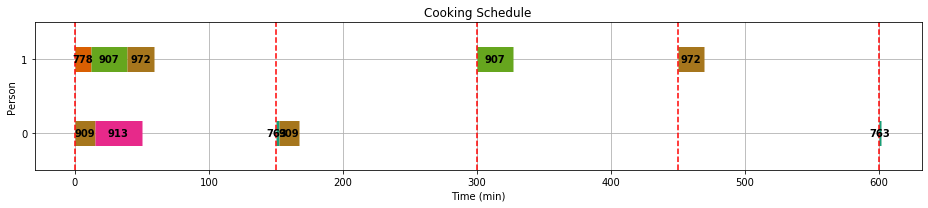

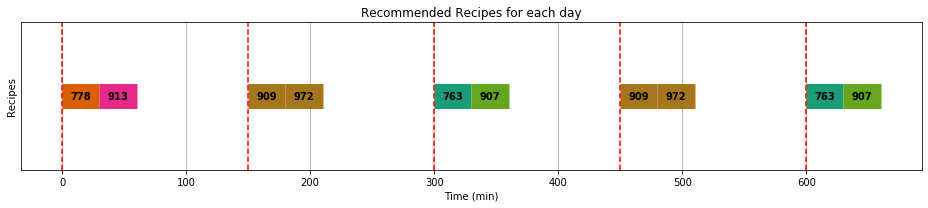

Solve  executes 20.335 s
SolveForAlternative  executes 20.335 s
Ys: [(0, 0, 909), (0, 0, 913), (0, 1, 763), (0, 1, 909), (0, 4, 763), (1, 0, 778), (1, 0, 907), (1, 0, 972), (1, 2, 907), (1, 3, 972)]
Xs: [(0, 778), (0, 913), (1, 909), (1, 972), (2, 763), (2, 907), (3, 909), (3, 972), (4, 763), (4, 907)]
----------------------------------------------------------------------------------------------------
Solution6 :


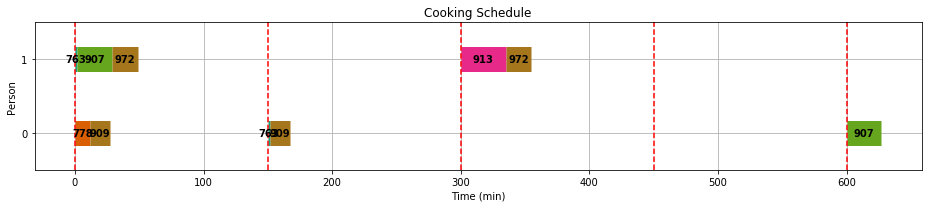

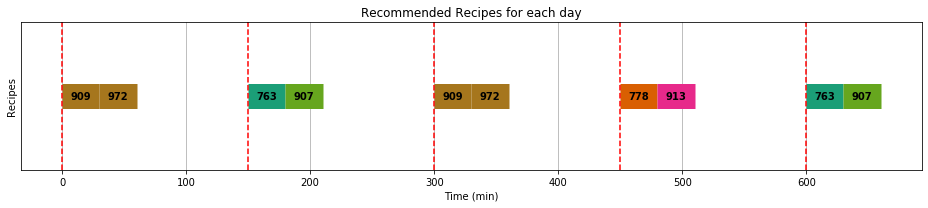

Solve  executes 20.737 s
SolveForAlternative  executes 20.738 s
Ys: [(0, 0, 778), (0, 0, 909), (0, 1, 763), (0, 1, 909), (0, 4, 907), (1, 0, 763), (1, 0, 907), (1, 0, 972), (1, 2, 913), (1, 2, 972)]
Xs: [(0, 909), (0, 972), (1, 763), (1, 907), (2, 909), (2, 972), (3, 778), (3, 913), (4, 763), (4, 907)]
----------------------------------------------------------------------------------------------------
Solution7 :


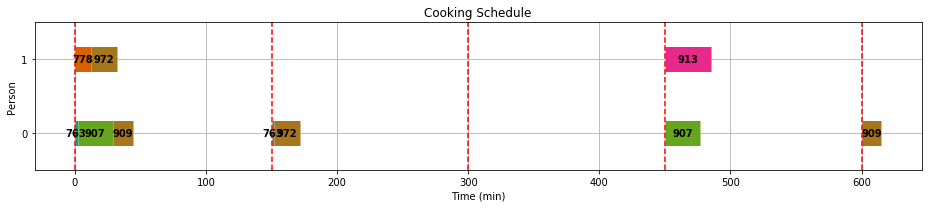

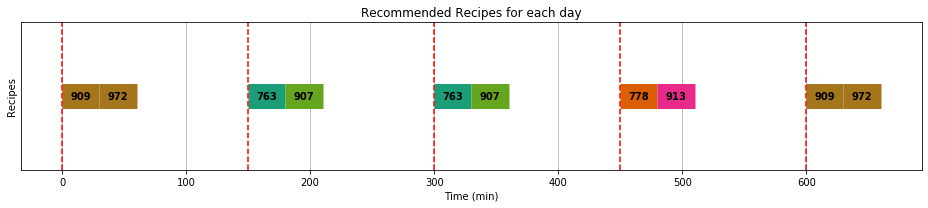

Solve  executes 20.345 s
SolveForAlternative  executes 20.345 s
Ys: [(0, 0, 763), (0, 0, 907), (0, 0, 909), (0, 1, 763), (0, 1, 972), (0, 3, 907), (0, 4, 909), (1, 0, 778), (1, 0, 972), (1, 3, 913)]
Xs: [(0, 909), (0, 972), (1, 763), (1, 907), (2, 763), (2, 907), (3, 778), (3, 913), (4, 909), (4, 972)]
----------------------------------------------------------------------------------------------------
Solution8 :


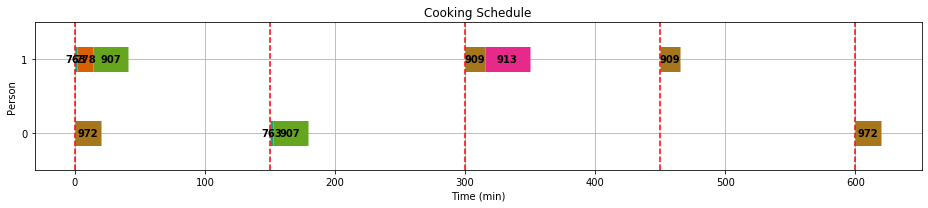

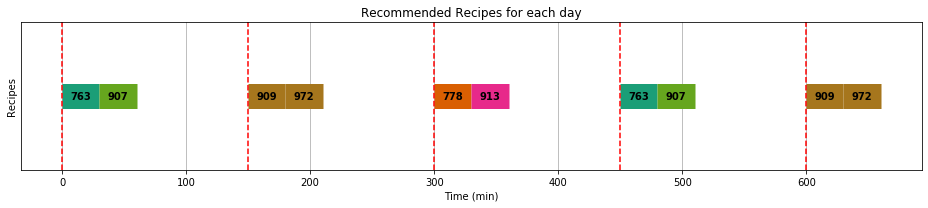

Solve  executes 20.823 s
SolveForAlternative  executes 20.823 s
Ys: [(0, 0, 972), (0, 1, 763), (0, 1, 907), (0, 4, 972), (1, 0, 763), (1, 0, 778), (1, 0, 907), (1, 2, 909), (1, 2, 913), (1, 3, 909)]
Xs: [(0, 763), (0, 907), (1, 909), (1, 972), (2, 778), (2, 913), (3, 763), (3, 907), (4, 909), (4, 972)]
----------------------------------------------------------------------------------------------------
Solution9 :


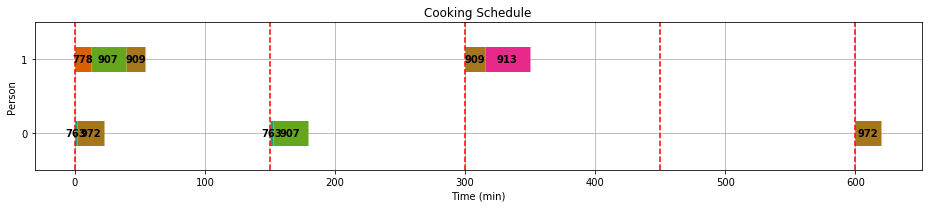

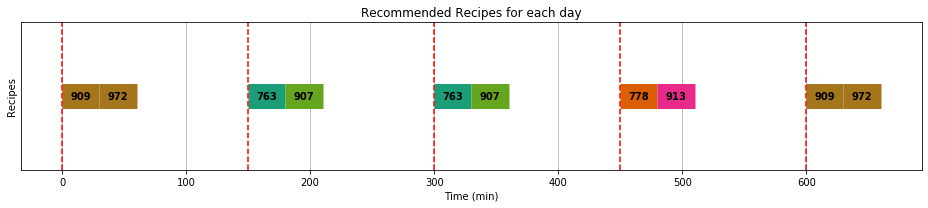

Solve  executes 20.25 s
SolveForAlternative  executes 20.25 s
Ys: [(0, 0, 763), (0, 0, 972), (0, 1, 763), (0, 1, 907), (0, 4, 972), (1, 0, 778), (1, 0, 907), (1, 0, 909), (1, 2, 909), (1, 2, 913)]
Xs: [(0, 909), (0, 972), (1, 763), (1, 907), (2, 763), (2, 907), (3, 778), (3, 913), (4, 909), (4, 972)]
Solution repeated.


In [223]:
print("Solution1:")
c = modelClass(data_param)
c.Solve()
print("Ys:", c.ys)
print("Xs:", c.xs)
s = 2
prexs = []
repeated = False
while c.xs and s <= 50 and not repeated:
    prexs.append(c.xs)
    print('-'*100)
    print("Solution"+str(s),':')
    c.SolveForAlternative()
    print("Ys:", c.ys)
    print("Xs:", c.xs)
    s += 1
    
    # check for repeated solution
    for prex in prexs:        
        if c.xs == prex:
            repeated = True
            break

if c.xs and not repeated:
    print("There are more than",s-1,"alternatives. ")
elif repeated:
    print("Solution repeated.")

In [260]:
data[data.title == recipes[c.xs[0][1]]].title.values

array(['GALLO PINTO (COSTA RICAN RICE AND BEANS)'], dtype=object)

In [266]:
result = pd.DataFrame(columns = ['url','title'])
for x in c.xs:
    result = result.append({'url': data[data.title == recipes[x[1]]].page_url.values[0],
                   'title':data[data.title == recipes[x[1]]].title.values[0]}, ignore_index=True)
result.index = c.xs
result.to_csv('result.csv')